In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

# Project
## College Student Manegment Risk Prediction ML Analysis 

In [17]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\college_student_management_data.csv")

# Data Info 

In [18]:
df.shape

(1545, 15)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   student_id                    1545 non-null   object 
 1   age                           1545 non-null   int64  
 2   gender                        1545 non-null   object 
 3   major                         1545 non-null   object 
 4   GPA                           1545 non-null   float64
 5   course_load                   1545 non-null   int64  
 6   avg_course_grade              1545 non-null   float64
 7   attendance_rate               1545 non-null   float64
 8   enrollment_status             1545 non-null   object 
 9   lms_logins_past_month         1545 non-null   int64  
 10  avg_session_duration_minutes  1545 non-null   int64  
 11  assignment_submission_rate    1545 non-null   float64
 12  forum_participation_count     1545 non-null   int64  
 13  vid

In [20]:
df.head()

,student_id,age,gender,major,GPA,course_load,avg_course_grade,attendance_rate,enrollment_status,lms_logins_past_month,avg_session_duration_minutes,assignment_submission_rate,forum_participation_count,video_completion_rate,risk_level
0,S001,24,Other,Computer Science,2.42,5,67.2,0.71,Graduated,32,33,0.70,8,0.74,High
1,S002,21,Male,Arts,3.73,6,64.4,0.84,Leave,29,53,0.91,13,0.85,Medium
2,S003,22,Male,Computer Science,2.80,3,95.3,0.89,Graduated,34,69,0.58,18,0.99,Medium
3,S004,24,Male,Arts,2.59,4,73.7,0.98,Graduated,22,18,0.91,6,0.72,Medium
4,S005,20,Other,Computer Science,2.30,4,87.4,0.95,Active,9,11,0.77,15,0.76,High


# Data Handling & Cleaning 

In [21]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [22]:
df.drop(columns=["student_id"],inplace=True)

# EDA,Visualization & Machine Learning

In [23]:
df.head()

,age,gender,major,GPA,course_load,avg_course_grade,attendance_rate,enrollment_status,lms_logins_past_month,avg_session_duration_minutes,assignment_submission_rate,forum_participation_count,video_completion_rate,risk_level
0,24,Other,Computer Science,2.42,5,67.2,0.71,Graduated,32,33,0.70,8,0.74,High
1,21,Male,Arts,3.73,6,64.4,0.84,Leave,29,53,0.91,13,0.85,Medium
2,22,Male,Computer Science,2.80,3,95.3,0.89,Graduated,34,69,0.58,18,0.99,Medium
3,24,Male,Arts,2.59,4,73.7,0.98,Graduated,22,18,0.91,6,0.72,Medium
4,20,Other,Computer Science,2.30,4,87.4,0.95,Active,9,11,0.77,15,0.76,High


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           1545 non-null   int64  
 1   gender                        1545 non-null   object 
 2   major                         1545 non-null   object 
 3   GPA                           1545 non-null   float64
 4   course_load                   1545 non-null   int64  
 5   avg_course_grade              1545 non-null   float64
 6   attendance_rate               1545 non-null   float64
 7   enrollment_status             1545 non-null   object 
 8   lms_logins_past_month         1545 non-null   int64  
 9   avg_session_duration_minutes  1545 non-null   int64  
 10  assignment_submission_rate    1545 non-null   float64
 11  forum_participation_count     1545 non-null   int64  
 12  video_completion_rate         1545 non-null   float64
 13  ris

In [25]:
le=LabelEncoder()
for col in df.select_dtypes(include="object"):
    df[col]=le.fit_transform(df[col])

In [26]:
df.head()

,age,gender,major,GPA,course_load,avg_course_grade,attendance_rate,enrollment_status,lms_logins_past_month,avg_session_duration_minutes,assignment_submission_rate,forum_participation_count,video_completion_rate,risk_level
0,24,2,2,2.42,5,67.2,0.71,1,32,33,0.70,8,0.74,0
1,21,1,0,3.73,6,64.4,0.84,2,29,53,0.91,13,0.85,2
2,22,1,2,2.80,3,95.3,0.89,1,34,69,0.58,18,0.99,2
3,24,1,0,2.59,4,73.7,0.98,1,22,18,0.91,6,0.72,2
4,20,2,2,2.30,4,87.4,0.95,0,9,11,0.77,15,0.76,0


# Multinomial Logistic Regression Model 

In [27]:
x=df.drop(columns=["risk_level"])
y=df["risk_level"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
model_mlg=LogisticRegression(multi_class="multinomial",solver="lbfgs",max_iter=1000)
model_mlg.fit(x_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'multinomial'


In [30]:
y_pred=model_mlg.predict(x_test_scaled)
acc=accuracy_score(y_test,y_pred)
print(f"The Accuracy Score Is {acc}")

The Accuracy Score Is 0.8025889967637541


              precision    recall  f1-score   support

           0       0.90      0.86      0.88       182
           1       0.83      0.78      0.80        49
           2       0.60      0.68      0.63        78

    accuracy                           0.80       309
   macro avg       0.77      0.77      0.77       309
weighted avg       0.81      0.80      0.81       309



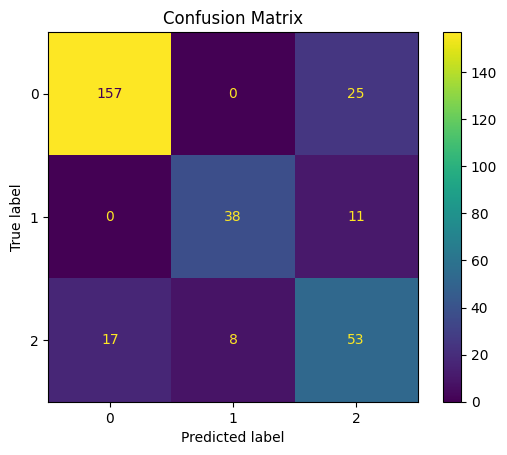

Multiclass ROC-AUC Score: 0.936410548165329


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

# Classification report
print(classification_report(y_test, y_pred))

# Static confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()

# Interactive confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1", "Actual 2"],
                         columns=["Predicted 0", "Predicted 1", "Predicted 2"])
fig = px.imshow(cm_df, text_auto=True, color_continuous_scale="Blues",
                title="Interactive Confusion Matrix")
fig.show()

# ROC-AUC Score (One-vs-Rest)
y_prob = model_mlg.predict_proba(x_test_scaled)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print("Multiclass ROC-AUC Score:", roc_auc)


# K-Neighbors Classifier 

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       182
           1       0.74      0.69      0.72        49
           2       0.47      0.42      0.45        78

    accuracy                           0.73       309
   macro avg       0.68      0.66      0.67       309
weighted avg       0.72      0.73      0.73       309



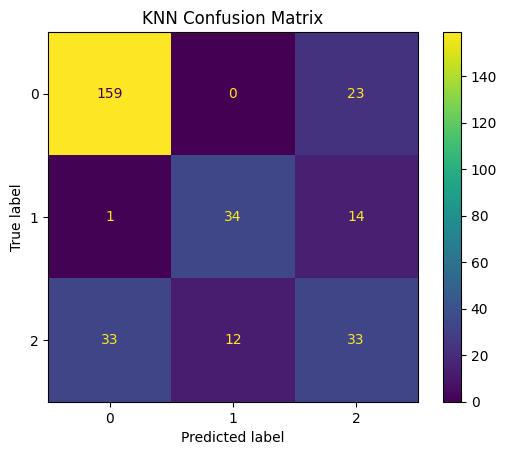

Multiclass ROC-AUC Score: 0.8501384400709485


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
import matplotlib.pyplot as plt
import plotly.express as px

# Features and target
x = df.drop(columns=["risk_level"])
y = df["risk_level"]

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train_scaled, y_train)

# Predict and evaluate
y_pred = knn_model.predict(x_test_scaled)
y_prob = knn_model.predict_proba(x_test_scaled)

# Classification report
print(classification_report(y_test, y_pred))

# Static confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("KNN Confusion Matrix")
plt.show()

# Interactive confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1", "Actual 2"],
                         columns=["Predicted 0", "Predicted 1", "Predicted 2"])
fig = px.imshow(cm_df, text_auto=True, color_continuous_scale="Blues",
                title="Interactive Confusion Matrix")
fig.show()

# ROC-AUC Score (One-vs-Rest)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print("Multiclass ROC-AUC Score:", roc_auc)
